# CONTENT

#### 1-Importing libraries/datasets
#### 2- Converting stops csv to geojson
#### 3- Joining ward and stops geojsons to create dictionary
#### 4- Finding number of points of interest in each ward
#### 5- Finding number of schools in each ward
#### 6- Finding number of places of worship in each ward
#### 7- Finding distance to nearest bus station
#### 8- Finding number of stations in each ward
#### 9- Exporting datasets

# 1 Importing libraries/datasets

In [52]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
import os
from shapely.geometry import Point
from shapely.ops import nearest_points

In [8]:
routes='/Users/Amaikuru/Downloads/routes.json'

In [9]:

df = gpd.read_file(routes)
df

,OBJECTID,LINEID,LINEABBR,LINENAME,LINECLUSTERABBR,SHAPE.STLength(),geometry
0,28,35675.0,129A,TTC McCOWAN NORTH,TTC,17763.891003,"MULTILINESTRING ((-79.27511 43.83080, -79.2751..."
1,50,35671.0,102D,TTC MARKHAM ROAD,TTC,35192.041128,"MULTILINESTRING ((-79.25545 43.85515, -79.2554..."
2,91,35647.0,068B,TTC WARDEN,TTC,24081.191155,"MULTILINESTRING ((-79.29434 43.74435, -79.2940..."
3,142,35620.0,017A,TTC BIRCHMOUNT,TTC,18185.033004,"MULTILINESTRING ((-79.32405 43.85497, -79.3240..."
4,155,35676.0,160,TTC BATHURST NORTH,TTC,14662.429470,"MULTILINESTRING ((-79.45390 43.80926, -79.4540..."


In [12]:
df.to_file("routes_geo.geoson", driver='GeoJSON')

In [2]:
gpd.options.use_pygeos = False

In [8]:
wards='/Users/Amaikuru/Desktop/Toronto Bus Delays/02 Data/Original/city_wards.geojson'

In [10]:
#setting pandas to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
#reading geojson file for neighborhoods

df = gpd.read_file(wards)
df

,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,626,2457740,2018-08-07 18:11:06,3000-01-01T05:00:00,25993196,528,None,CITW,None,None,7,7,Humber River-Black Creek,Humber River-Black Creek (7),None,None,279754,-1,None,None,None,None,17344785,5.886873e+07,43438.943048,"POLYGON ((-79.49105 43.76350, -79.49008 43.759..."
1,627,2457739,2018-08-07 18:11:06,3000-01-01T05:00:00,25993195,528,None,CITW,None,None,6,6,York Centre,York Centre (6),None,None,279754,-1,None,None,None,None,17344801,6.780539e+07,40910.174619,"POLYGON ((-79.44043 43.76340, -79.43998 43.761..."
2,628,2457738,2018-08-07 18:11:06,3000-01-01T05:00:00,25993194,528,None,CITW,None,None,18,18,Willowdale,Willowdale (18),None,None,279754,-1,None,None,None,None,17344817,3.792649e+07,24766.996984,"POLYGON ((-79.39449 43.76157, -79.39461 43.761..."
3,629,2457737,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193,528,None,CITW,None,None,11,11,University-Rosedale,University-Rosedale (11),None,None,279754,-1,None,None,None,None,17344833,2.600299e+07,29861.631464,"POLYGON ((-79.39004 43.69050, -79.39004 43.690..."
4,630,2457736,2018-08-07 18:11:06,3000-01-01T05:00:00,25993192,528,None,CITW,None,None,19,19,Beaches-East York,Beaches-East York (19),None,None,279754,-1,None,None,None,None,17344849,3.215503e+07,30975.878034,"POLYGON ((-79.29864 43.71515, -79.29837 43.714..."
5,631,2457735,2018-08-07 18:11:06,3000-01-01T05:00:00,25993191,528,None,CITW,None,None,20,20,Scarborough Southwest,Scarborough Southwest (20),None,None,279754,-1,None,None,None,None,17344865,5.398787e+07,45132.346110,"POLYGON ((-79.27903 43.67167, -79.28021 43.674..."
6,632,2457734,2018-08-07 18:11:06,3000-01-01T05:00:00,25993190,528,None,CITW,None,None,25,25,Scarborough-Rouge Park,Scarborough-Rouge Park (25),None,None,279754,-1,None,None,None,None,17344881,1.039006e+08,52384.382994,"POLYGON ((-79.16478 43.84333, -79.16250 43.838..."
7,633,2457733,2018-08-07 18:11:06,3000-01-01T05:00:00,25993189,528,None,CITW,None,None,23,23,Scarborough North,Scarborough North (23),None,None,279754,-1,None,None,None,None,17344897,5.847579e+07,33292.578943,"POLYGON ((-79.22591 43.83960, -79.22556 43.839..."
8,634,2457732,2018-08-07 18:11:06,3000-01-01T05:00:00,25993188,528,None,CITW,None,None,24,24,Scarborough-Guildwood,Scarborough-Guildwood (24),None,None,279754,-1,None,None,None,None,17344913,5.010259e+07,31659.059087,"POLYGON ((-79.18192 43.75809, -79.18119 43.756..."
9,635,2457731,2018-08-07 18:11:06,3000-01-01T05:00:00,25993187,528,None,CITW,None,None,21,21,Scarborough Centre,Scarborough Centre (21),None,None,279754,-1,None,None,None,None,17344929,5.408523e+07,31081.950495,"POLYGON ((-79.25021 43.76864, -79.24974 43.767..."


In [221]:
df.columns

Index(['_id', 'AREA_ID', 'DATE_EFFECTIVE', 'DATE_EXPIRY', 'AREA_ATTR_ID',
       'AREA_TYPE_ID', 'PARENT_AREA_ID', 'AREA_TYPE', 'AREA_CLASS_ID',
       'AREA_CLASS', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'Ward_name',
       'AREA_DESC', 'FEATURE_CODE', 'FEATURE_CODE_DESC', 'TRANS_ID_CREATE',
       'TRANS_ID_EXPIRE', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [46]:
routes=pd.read_csv(os.path.join(path, '02 Data', 'Original', 'routesss.csv'))

In [47]:
routes.head()

,stop_id,stop_code,stop_name,route_id,route_short_name,stop_lat,stop_lon
0,14155,14633,Don Mills Station,66502,10,43.776222,-79.347048
1,3807,1949,Don Mills Rd at Leith Hill Rd North Side,66502,10,43.777534,-79.347811
2,6904,1929,Don Mills Rd at Fairview Mall Dr North Side,66502,10,43.779530,-79.348701
3,1163,1938,Don Mills Rd at Godstone Rd,66502,10,43.782682,-79.348922
4,7723,1919,Don Mills Rd at Deerford Rd,66502,10,43.785281,-79.350570


In [48]:
routes.dtypes

stop_id               int64
stop_code             int64
stop_name            object
route_id              int64
route_short_name      int64
stop_lat            float64
stop_lon            float64
dtype: object

In [49]:
routes['route_short_name']=routes['route_short_name'].astype('str')

In [50]:
routes=routes[['route_short_name','stop_lat','stop_lon']]

In [51]:
routes=df_to_gdf(routes)

In [44]:
routes.to_file("routes.geojson", driver='GeoJSON')

In [4]:
#importing stops geojson
path=r'/Users/Amaikuru/Desktop/Toronto Bus Delays'

In [5]:
stops=pd.read_csv(os.path.join(path, '02 Data', 'Original', 'stops.csv'))

In [6]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,Danforth Rd at Kennedy Rd,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,Davenport Rd at Bedford Rd,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,Davenport Rd at Dupont St,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2
3,265,1871,Davisville Ave at Cleveland St,NaN,43.702088,-79.378112,NaN,NaN,NaN,NaN,NaN,1
4,266,11700,Disco Rd at Attwell Dr,NaN,43.701362,-79.594843,NaN,NaN,NaN,NaN,NaN,1


# 2 Converting stops csv to geojson

In [15]:
stops.columns

Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'zone_id', 'stop_url', 'location_type', 'parent_station',
       'stop_timezone', 'wheelchair_boarding'],
      dtype='object')

In [16]:
#renaming stop_lon and stop_lat
stops.rename(columns = {'stop_lat':'latitude', 'stop_lon':'longitude'}, inplace = True)

In [17]:
#changing stop names to uppercase
stops['stop_name']=stops['stop_name'].str.upper()

In [18]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,latitude,longitude,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,262,662,DANFORTH RD AT KENNEDY RD,NaN,43.714379,-79.260939,NaN,NaN,NaN,NaN,NaN,1
1,263,929,DAVENPORT RD AT BEDFORD RD,NaN,43.674448,-79.399659,NaN,NaN,NaN,NaN,NaN,1
2,264,940,DAVENPORT RD AT DUPONT ST,NaN,43.675511,-79.401938,NaN,NaN,NaN,NaN,NaN,2
3,265,1871,DAVISVILLE AVE AT CLEVELAND ST,NaN,43.702088,-79.378112,NaN,NaN,NaN,NaN,NaN,1
4,266,11700,DISCO RD AT ATTWELL DR,NaN,43.701362,-79.594843,NaN,NaN,NaN,NaN,NaN,1


In [20]:
#creating slice of dataframe with only stop name and geometry
stops2=stops[['stop_name','longitude','latitude']]

In [21]:
stops2.head()

,stop_name,longitude,latitude
0,DANFORTH RD AT KENNEDY RD,-79.260939,43.714379
1,DAVENPORT RD AT BEDFORD RD,-79.399659,43.674448
2,DAVENPORT RD AT DUPONT ST,-79.401938,43.675511
3,DAVISVILLE AVE AT CLEVELAND ST,-79.378112,43.702088
4,DISCO RD AT ATTWELL DR,-79.594843,43.701362


In [22]:
stops_geojson=df_to_gdf(stops2)

In [23]:
stops_geojson.dtypes

stop_name      object
longitude     float64
latitude      float64
geometry     geometry
dtype: object

# 3 Joining ward and stops geojsons to create dictionary

In [24]:
df.has_sindex

False

In [25]:
#including spatial index for df
df.sindex

rtree.index.Index(bounds=[-79.6392649324429, 43.5809960000775, -79.1154514950547, 43.8554571861712], size=25)

In [26]:
df.has_sindex

True

In [121]:
#joining neighborhoods geojson and stops geojson
joinDF=sjoin(stops_geojson, df, how='left',predicate="within")

In [122]:
joinDF.head()

,stop_name,longitude,latitude,geometry,index_right,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,Ward_name,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length
0,DANFORTH RD AT KENNEDY RD,-79.260939,43.714379,POINT (-79.26094 43.71438),5.0,631.0,2457735.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993191.0,528.0,None,CITW,None,None,20.0,20.0,Scarborough Southwest,Scarborough Southwest (20),None,None,279754.0,-1.0,None,None,None,None,17344865.0,5.398787e+07,45132.346110
1,DAVENPORT RD AT BEDFORD RD,-79.399659,43.674448,POINT (-79.39966 43.67445),3.0,629.0,2457737.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193.0,528.0,None,CITW,None,None,11.0,11.0,University-Rosedale,University-Rosedale (11),None,None,279754.0,-1.0,None,None,None,None,17344833.0,2.600299e+07,29861.631464
2,DAVENPORT RD AT DUPONT ST,-79.401938,43.675511,POINT (-79.40194 43.67551),3.0,629.0,2457737.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193.0,528.0,None,CITW,None,None,11.0,11.0,University-Rosedale,University-Rosedale (11),None,None,279754.0,-1.0,None,None,None,None,17344833.0,2.600299e+07,29861.631464
3,DAVISVILLE AVE AT CLEVELAND ST,-79.378112,43.702088,POINT (-79.37811 43.70209),11.0,637.0,2457729.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993185.0,528.0,None,CITW,None,None,15.0,15.0,Don Valley West,Don Valley West (15),None,None,279754.0,-1.0,None,None,None,None,17344961.0,5.804883e+07,37532.814407
4,DISCO RD AT ATTWELL DR,-79.594843,43.701362,POINT (-79.59484 43.70136),14.0,640.0,2457726.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993182.0,528.0,None,CITW,None,None,1.0,1.0,Etobicoke North,Etobicoke North (1),None,None,279754.0,-1.0,None,None,None,None,17345009.0,9.264135e+07,51338.921860


In [123]:
#checking for nan entries 
joinDF.isnull().sum()

stop_name               0
longitude               0
latitude                0
geometry                0
index_right           345
_id                   345
AREA_ID               345
DATE_EFFECTIVE        345
DATE_EXPIRY           345
AREA_ATTR_ID          345
AREA_TYPE_ID          345
PARENT_AREA_ID       9430
AREA_TYPE             345
AREA_CLASS_ID        9430
AREA_CLASS           9430
AREA_SHORT_CODE       345
AREA_LONG_CODE        345
Ward_name             345
AREA_DESC             345
FEATURE_CODE         9430
FEATURE_CODE_DESC    9430
TRANS_ID_CREATE       345
TRANS_ID_EXPIRE       345
X                    9430
Y                    9430
LONGITUDE            9430
LATITUDE             9430
OBJECTID              345
Shape__Area           345
Shape__Length         345
dtype: int64

In [124]:
#changing column names 
df.rename(columns = {'AREA_NAME':'Ward_name'}, inplace = True)
joinDF.rename(columns = {'AREA_NAME':'Ward_name'}, inplace = True)

In [125]:
joinDF.head()

,stop_name,longitude,latitude,geometry,index_right,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,Ward_name,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length
0,DANFORTH RD AT KENNEDY RD,-79.260939,43.714379,POINT (-79.26094 43.71438),5.0,631.0,2457735.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993191.0,528.0,None,CITW,None,None,20.0,20.0,Scarborough Southwest,Scarborough Southwest (20),None,None,279754.0,-1.0,None,None,None,None,17344865.0,5.398787e+07,45132.346110
1,DAVENPORT RD AT BEDFORD RD,-79.399659,43.674448,POINT (-79.39966 43.67445),3.0,629.0,2457737.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193.0,528.0,None,CITW,None,None,11.0,11.0,University-Rosedale,University-Rosedale (11),None,None,279754.0,-1.0,None,None,None,None,17344833.0,2.600299e+07,29861.631464
2,DAVENPORT RD AT DUPONT ST,-79.401938,43.675511,POINT (-79.40194 43.67551),3.0,629.0,2457737.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193.0,528.0,None,CITW,None,None,11.0,11.0,University-Rosedale,University-Rosedale (11),None,None,279754.0,-1.0,None,None,None,None,17344833.0,2.600299e+07,29861.631464
3,DAVISVILLE AVE AT CLEVELAND ST,-79.378112,43.702088,POINT (-79.37811 43.70209),11.0,637.0,2457729.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993185.0,528.0,None,CITW,None,None,15.0,15.0,Don Valley West,Don Valley West (15),None,None,279754.0,-1.0,None,None,None,None,17344961.0,5.804883e+07,37532.814407
4,DISCO RD AT ATTWELL DR,-79.594843,43.701362,POINT (-79.59484 43.70136),14.0,640.0,2457726.0,2018-08-07 18:11:06,3000-01-01T05:00:00,25993182.0,528.0,None,CITW,None,None,1.0,1.0,Etobicoke North,Etobicoke North (1),None,None,279754.0,-1.0,None,None,None,None,17345009.0,9.264135e+07,51338.921860


In [126]:
#creating dataset with just stop_name and ward_name
stop_ward=joinDF[['stop_name','Ward_name']]

In [127]:
#345 stops are outside the assigned wards
stop_ward.isnull().sum()

stop_name      0
Ward_name    345
dtype: int64

In [128]:
#locating points not found
orphans_gdf = joinDF[joinDF.Ward_name.isna()]

In [129]:
orphans_gdf.shape

(345, 30)

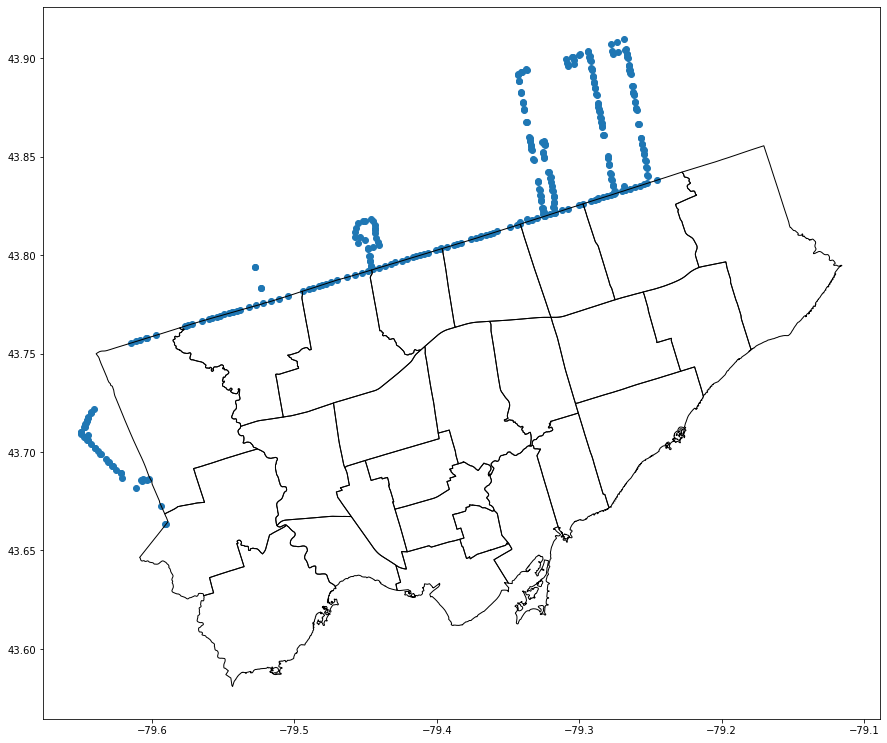

In [130]:
#all the points are located outside toronto or at the boundary to toronto
ax = orphans_gdf.plot(figsize=(15, 15))
ax = df.plot(facecolor="none", edgecolor="black", ax=ax)

In [131]:
#I will enter the ward values of these points as (outside_wards)
joinDF['Ward_name']=joinDF['Ward_name'].fillna('outside_wards')

In [132]:
#all ward name rows are filled
joinDF.isnull().sum()

stop_name               0
longitude               0
latitude                0
geometry                0
index_right           345
_id                   345
AREA_ID               345
DATE_EFFECTIVE        345
DATE_EXPIRY           345
AREA_ATTR_ID          345
AREA_TYPE_ID          345
PARENT_AREA_ID       9430
AREA_TYPE             345
AREA_CLASS_ID        9430
AREA_CLASS           9430
AREA_SHORT_CODE       345
AREA_LONG_CODE        345
Ward_name               0
AREA_DESC             345
FEATURE_CODE         9430
FEATURE_CODE_DESC    9430
TRANS_ID_CREATE       345
TRANS_ID_EXPIRE       345
X                    9430
Y                    9430
LONGITUDE            9430
LATITUDE             9430
OBJECTID              345
Shape__Area           345
Shape__Length         345
dtype: int64

In [133]:
joinDF['Ward_name'].value_counts()

Etobicoke-Lakeshore         535
Etobicoke North             533
Scarborough Southwest       460
York Centre                 453
Scarborough North           440
Etobicoke Centre            430
Humber River-Black Creek    427
York South-Weston           420
Scarborough Centre          412
Eglinton-Lawrence           400
Don Valley West             384
Scarborough-Rouge Park      372
Beaches-East York           366
Toronto-Danforth            364
outside_wards               345
Don Valley East             328
Scarborough-Agincourt       327
University-Rosedale         320
Davenport                   313
Parkdale-High Park          306
Willowdale                  291
Don Valley North            280
Toronto-St. Paul's          278
Scarborough-Guildwood       232
Toronto Centre              209
Spadina-Fort York           205
Name: Ward_name, dtype: int64

In [134]:
stop_ward=joinDF[['stop_name','Ward_name']]

In [188]:
#creating dictionary for number of stops in each ward
stops_dict=stop_ward.groupby(["Ward_name"], as_index=False)["stop_name"].count()

In [189]:
stops_dict

,Ward_name,stop_name
0,Beaches-East York,366
1,Davenport,313
2,Don Valley East,328
3,Don Valley North,280
4,Don Valley West,384
5,Eglinton-Lawrence,400
6,Etobicoke Centre,430
7,Etobicoke North,533
8,Etobicoke-Lakeshore,535
9,Humber River-Black Creek,427


In [191]:
#renaming count column
stops_dict.rename(columns={'stop_name':'n_stops'},inplace=True)

In [192]:
stops_dict

,Ward_name,n_stops
0,Beaches-East York,366
1,Davenport,313
2,Don Valley East,328
3,Don Valley North,280
4,Don Valley West,384
5,Eglinton-Lawrence,400
6,Etobicoke Centre,430
7,Etobicoke North,533
8,Etobicoke-Lakeshore,535
9,Humber River-Black Creek,427


## 4 Finding number of points of interest in each ward

In [137]:
#importing file
attractions='/Users/Amaikuru/Desktop/Toronto Bus Delays/02 Data/Original/attractions.geojson'

In [138]:
attractions=gpd.read_file(attractions)

In [139]:
attractions.head()

,_id,ADDRESS_INFO,NAME,CATEGORY,PHONE,EMAIL,WEBSITE,GEOID,RECEIVED_DATE,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,WARD,WARD_2003,WARD_2018,MI_PRINX,ATTRACTION,MAP_ACCESS,geometry
0,1,,BMO Field,Sports / Entertainment Venue,416-815-5982,,https://www.bmofield.com/,20229243.0,,20229243.0,170,Princes' Blvd,170 Princes' Blvd,M6K 3C3,former Toronto,Toronto,CNE BMO Field,107007.0,20231258.0,170.0,,,,20228.0,Spadina-Fort York,19.0,10.0,4163950.0,BMO Field is home to the Toronto FC (Major Lea...,Y,POINT (-79.41842 43.63466)
1,2,,Aga Khan Museum,Museum,416-646-4677,,https://www.agakhanmuseum.org/,10142948.0,,10142948.0,77,Wynford Dr,77 Wynford Dr,M3C 1K1,North York,Toronto,,107008.0,444094.0,77.0,,,,7128.0,Don Valley East,26.0,16.0,4094277.0,"Dedicated to sharing the artistic, intellectua...",Y,POINT (-79.33180 43.72733)
2,3,,Scotiabank Arena (formerly Air Canada Centre),Sports / Entertainment Venue,416-815-5500,,https://www.scotiabankarena.com/,7929257.0,,7929257.0,40,Bay St,40 Bay St,M5J 2X2,former Toronto,Toronto,Scotiabank Arena,107010.0,7929256.0,40.0,,,,2962.0,Spadina-Fort York,28.0,10.0,3176821.0,The Scotiabank Arena is a multi-purpose indoor...,Y,POINT (-79.37880 43.64544)
3,4,,Al Green Theatre (at the Miles Nadal Jewish Co...,Performing Arts,416-924-6211,,http://www.algreentheatre.ca/,8418224.0,,8418224.0,750,Spadina Ave,750 Spadina Ave,M5S 2J2,former Toronto,Toronto,Miles Nadal Jewish Community Centre,115001.0,8418213.0,750.0,,,,4426.0,University-Rosedale,20.0,11.0,1951177.0,The Al Green Theatre is used for social and c...,N,POINT (-79.40386 43.66821)
4,5,,Alexander Muir Memorial Gardens,Nature/ Park,416-338-4386,,https://www.toronto.ca/data/parks/prd/faciliti...,10154587.0,,10154587.0,2901,Yonge St,2901 Yonge St,,former Toronto,Toronto,,106001.0,30094595.0,2901.0,,,,4733.0,Don Valley West,25.0,15.0,4217141.0,Named after the famous composer Alexander Muir...,Y,POINT (-79.40097 43.72353)


In [213]:
#making smaller set of data
attractions_set=attractions[['NAME','WARD','geometry']]

In [214]:
#joining with wards set
ward_poi=sjoin(attractions_set,df, how='left',predicate="within")

In [215]:
ward_poi.isnull().sum()

NAME                   0
WARD                   0
geometry               0
index_right            2
_id                    2
AREA_ID                2
DATE_EFFECTIVE         2
DATE_EXPIRY            2
AREA_ATTR_ID           2
AREA_TYPE_ID           2
PARENT_AREA_ID       174
AREA_TYPE              2
AREA_CLASS_ID        174
AREA_CLASS           174
AREA_SHORT_CODE        2
AREA_LONG_CODE         2
Ward_name              2
AREA_DESC              2
FEATURE_CODE         174
FEATURE_CODE_DESC    174
TRANS_ID_CREATE        2
TRANS_ID_EXPIRE        2
X                    174
Y                    174
LONGITUDE            174
LATITUDE             174
OBJECTID               2
Shape__Area            2
Shape__Length          2
dtype: int64

In [217]:
#LOCATING Null values
nulls=ward_poi.loc[ward_poi['Ward_name'].isnull()==True]

In [218]:
nulls.head()

,NAME,WARD,geometry,index_right,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,Ward_name,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length
18,Black Creek Pioneer Village,Humber River-Black Creek,POINT (-79.51784 43.77677),NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Toronto Pearson International Airport,,POINT (-79.61316 43.67750),NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


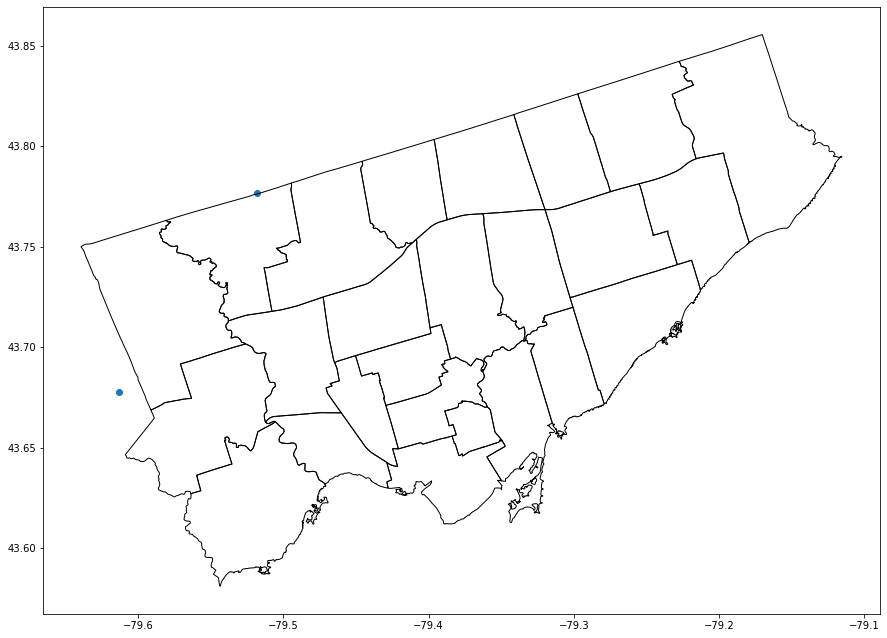

In [219]:

ax = nulls.plot(figsize=(15, 15))
ax = df.plot(facecolor="none", edgecolor="black", ax=ax)

#### one point lies at the edge of humber river while the airport is outside toronto

In [223]:
#will impute value into joined frame
ward_poi.loc[18,'Ward_name'] = 'Humber River-Black Creek'

In [225]:
ward_poi.isnull().sum()

NAME                   0
WARD                   0
geometry               0
index_right            2
_id                    2
AREA_ID                2
DATE_EFFECTIVE         2
DATE_EXPIRY            2
AREA_ATTR_ID           2
AREA_TYPE_ID           2
PARENT_AREA_ID       174
AREA_TYPE              2
AREA_CLASS_ID        174
AREA_CLASS           174
AREA_SHORT_CODE        2
AREA_LONG_CODE         2
Ward_name              1
AREA_DESC              2
FEATURE_CODE         174
FEATURE_CODE_DESC    174
TRANS_ID_CREATE        2
TRANS_ID_EXPIRE        2
X                    174
Y                    174
LONGITUDE            174
LATITUDE             174
OBJECTID               2
Shape__Area            2
Shape__Length          2
dtype: int64

In [226]:
#counting the number of stops in each ward
interest_dict=ward_poi.groupby(["Ward_name"], as_index=False)["NAME"].count()

In [227]:
interest_dict.isnull().sum()

Ward_name    0
NAME         0
dtype: int64

In [228]:
interest_dict.rename(columns={'NAME' : 'n_poi'},inplace=True)

In [229]:
interest_dict.isnull().sum()

Ward_name    0
n_poi        0
dtype: int64

In [231]:
interest_dict.shape

(23, 2)

In [232]:
df.shape

(25, 26)

## 5 Finding number of schools

In [160]:
schools='/Users/Amaikuru/Desktop/Toronto Bus Delays/02 Data/Original/schools.geojson'

In [161]:
schools=gpd.read_file(schools)

In [162]:
schools.head()

,_id,OBJECTID,GEO_ID,NAME,SCHOOL_LEVEL,SCHOOL_TYPE,BOARD_NAME,SOURCE_ADDRESS,SCHOOL_TYPE_DESC,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,PLACE_NAME,GENERAL_USE_CODE,CENTRELINE_ID,LO_NUM,LO_NUM_SUF,HI_NUM,HI_NUM_SUF,LINEAR_NAME_ID,geometry
0,1,1,330677,A PLUS ACADEMY OF ADVANCEMENT,None,PR,None,2425 EGLINTON AVE E,Private,330677,2425,Eglinton Ave E,2425 Eglinton Ave E,M1K 5G8,Scarborough,Toronto,None,104008,111254,2425,None,None,None,125,POINT (-79.26710 43.73208)
1,2,2,524780,A R S ARMENIAN PRIVATE SCHOOL,None,PR,None,50 HALLCROWN PL,Private,524780,50,Hallcrown Pl,50 Hallcrown Pl,M2J 1P7,North York,Toronto,None,104008,438652,50,None,None,None,5778,POINT (-79.32316 43.77005)
2,3,3,20258267,A Y J GLOBAL ACADEMY,None,PR,None,4 LANSING SQ,Private,20258267,4,Lansing Sq,4 Lansing Sq,M2J 5A2,North York,Toronto,None,104008,438287,4,None,None,None,6007,POINT (-79.32522 43.77408)
3,4,4,517961,A Y JACKSON SECONDARY SCHOOL,None,EP,Toronto District School Board,50 FRANCINE DR,English Public,517961,50,Francine Dr,50 Francine Dr,M2H 2G6,North York,Toronto,A. Y. Jackson Secondary School,102002,436260,50,None,None,None,5639,POINT (-79.36656 43.80526)
4,5,5,13967401,ABACUS MONTESSORI LEARNING CENTRE,None,PR,None,4 CREDIT UNION DR,Private,13967401,4,Credit Union Dr,4 Credit Union Dr,M4A 2N8,North York,Toronto,Latvian Canadian Centre,106007,444179,4,None,None,None,5294,POINT (-79.31901 43.72543)


In [163]:
schools.columns

Index(['_id', 'OBJECTID', 'GEO_ID', 'NAME', 'SCHOOL_LEVEL', 'SCHOOL_TYPE',
       'BOARD_NAME', 'SOURCE_ADDRESS', 'SCHOOL_TYPE_DESC', 'ADDRESS_POINT_ID',
       'ADDRESS_NUMBER', 'LINEAR_NAME_FULL', 'ADDRESS_FULL', 'POSTAL_CODE',
       'MUNICIPALITY', 'CITY', 'PLACE_NAME', 'GENERAL_USE_CODE',
       'CENTRELINE_ID', 'LO_NUM', 'LO_NUM_SUF', 'HI_NUM', 'HI_NUM_SUF',
       'LINEAR_NAME_ID', 'geometry'],
      dtype='object')

In [164]:
#creating subset 
schools=schools[['_id','NAME','geometry']]

In [165]:
ward_schools=sjoin(schools,df, how='left',predicate="within")

In [166]:
ward_schools.shape

(1194, 29)

In [167]:
ward_schools.head()

,_id_left,NAME,geometry,index_right,_id_right,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,Ward_name,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length
0,1,A PLUS ACADEMY OF ADVANCEMENT,POINT (-79.26710 43.73208),5,631,2457735,2018-08-07 18:11:06,3000-01-01T05:00:00,25993191,528,None,CITW,None,None,20,20,Scarborough Southwest,Scarborough Southwest (20),None,None,279754,-1,None,None,None,None,17344865,5.398787e+07,45132.346110
1,2,A R S ARMENIAN PRIVATE SCHOOL,POINT (-79.32316 43.77005),18,644,2457722,2018-08-07 18:11:06,3000-01-01T05:00:00,25993178,528,None,CITW,None,None,17,17,Don Valley North,Don Valley North (17),None,None,279754,-1,None,None,None,None,17345073,4.688259e+07,27888.817523
2,3,A Y J GLOBAL ACADEMY,POINT (-79.32522 43.77408),18,644,2457722,2018-08-07 18:11:06,3000-01-01T05:00:00,25993178,528,None,CITW,None,None,17,17,Don Valley North,Don Valley North (17),None,None,279754,-1,None,None,None,None,17345073,4.688259e+07,27888.817523
3,4,A Y JACKSON SECONDARY SCHOOL,POINT (-79.36656 43.80526),18,644,2457722,2018-08-07 18:11:06,3000-01-01T05:00:00,25993178,528,None,CITW,None,None,17,17,Don Valley North,Don Valley North (17),None,None,279754,-1,None,None,None,None,17345073,4.688259e+07,27888.817523
4,5,ABACUS MONTESSORI LEARNING CENTRE,POINT (-79.31901 43.72543),19,645,2457721,2018-08-07 18:11:06,3000-01-01T05:00:00,25993177,528,None,CITW,None,None,16,16,Don Valley East,Don Valley East (16),None,None,279754,-1,None,None,None,None,17345089,4.401710e+07,30862.987073


In [169]:
ward_schools.isnull().sum()

_id_left                0
NAME                    0
geometry                0
index_right             0
_id_right               0
AREA_ID                 0
DATE_EFFECTIVE          0
DATE_EXPIRY             0
AREA_ATTR_ID            0
AREA_TYPE_ID            0
PARENT_AREA_ID       1194
AREA_TYPE               0
AREA_CLASS_ID        1194
AREA_CLASS           1194
AREA_SHORT_CODE         0
AREA_LONG_CODE          0
Ward_name               0
AREA_DESC               0
FEATURE_CODE         1194
FEATURE_CODE_DESC    1194
TRANS_ID_CREATE         0
TRANS_ID_EXPIRE         0
X                    1194
Y                    1194
LONGITUDE            1194
LATITUDE             1194
OBJECTID                0
Shape__Area             0
Shape__Length           0
dtype: int64

#### all the schools are within wards

In [170]:
#making grouped set for count
school_dict=ward_schools.groupby(["Ward_name"], as_index=False)["NAME"].count()

In [171]:
school_dict.head()

,Ward_name,NAME
0,Beaches-East York,37
1,Davenport,37
2,Don Valley East,55
3,Don Valley North,71
4,Don Valley West,45


In [172]:
#renaming count column
school_dict.rename(columns={'NAME' : 'n_schools'},inplace=True)


## 6 Finding number of places of worship

In [173]:
#importing set
worship='/Users/Amaikuru/Desktop/Toronto Bus Delays/02 Data/Original/worship.geojson'

In [174]:
worship=gpd.read_file(worship)

In [175]:
worship.head()

,ADDRESS_FULL,ADDRESS_NUMBER,ADDRESS_POINT_ID,CENTRELINE_ID,CITY,COMM_COUNCIL_CODE,COMM_COUNCIL_NAME,FTH_CELL,FTH_CONTACT,FTH_DENOMINATION,FTH_EMAIL,FTH_EXTENSION,FTH_FAITH,FTH_FAX,FTH_FIRST_NAME,FTH_FORUM,FTH_GROUPING,FTH_HOME,FTH_LAST_NAME,FTH_ORGANIZATION,FTH_PHONE,FTH_POSITION,FTH_PRIORITY,FTH_SALUTATION,FTH_WEBSITE,GENERAL_USE_CODE,HI_NUM,HI_NUM_SUF,LATITUDE,LINEAR_NAME_FULL,LINEAR_NAME_ID,LONGITUDE,LO_NUM,LO_NUM_SUF,MUNICIPALITY,NEIGHBOURHOOD_NAME,OBJECTID,PLACE_NAME,POSTAL_CODE,WARD_NAME,WARD_NUMBER,X,Y,_id,geometry
0,851 Ossington Ave,851,850128,1143238,Toronto,SO,TORONTO AND EAST YORK COMMUNITY COUNCIL,None,None,None,None,None,Christian,None,None,None,None,None,None,Church Of Jesus Christ Of La,None,None,None,None,None,109001,NaN,None,None,Ossington Ave,4125,None,851,None,former TORONTO,Dovercourt-Wallace Emerson-Junction (93),1,Church Of Jesus Christ,M6G3V2,University-Rosedale (11),11,None,None,1,POINT (-1383878.553 5054026.649)
1,1219 Dufferin St,1219,10312972,10312971,Toronto,SO,TORONTO AND EAST YORK COMMUNITY COUNCIL,None,None,None,None,None,Christian,None,None,None,None,None,None,Dufferin St Baptist Church,None,None,None,None,None,109001,NaN,None,None,Dufferin St,557,None,1219,None,former TORONTO,Dovercourt-Wallace Emerson-Junction (93),2,Dufferin St Baptist Church,M6H4C2,Davenport (9),9,None,None,2,POINT (-1384781.217 5054388.825)
2,700 Dovercourt Rd,700,10877578,14018294,Toronto,SO,TORONTO AND EAST YORK COMMUNITY COUNCIL,None,None,None,None,None,Christian,None,None,None,None,None,None,Dovercourt Presbyterian Chur,None,None,None,None,None,115001,NaN,None,None,Dovercourt Rd,3317,None,700,None,former TORONTO,Dufferin Grove (83),3,None,None,Davenport (9),9,None,None,3,POINT (-1384277.745 5053427.551)
3,1140 Bloor St W,1140,6710178,6710177,Toronto,SO,TORONTO AND EAST YORK COMMUNITY COUNCIL,None,None,None,None,None,Christian,None,None,None,None,None,None,Dovercourt Baptist Church,None,None,None,None,None,109001,NaN,None,None,Bloor St W,458,None,1140,None,former TORONTO,Dovercourt-Wallace Emerson-Junction (93),4,Dovercourt Baptist,M6H4E6,Davenport (9),9,None,None,4,POINT (-1384826.765 5053669.614)
4,524 St Clarens Ave,524,872604,1143779,Toronto,SO,TORONTO AND EAST YORK COMMUNITY COUNCIL,None,None,None,None,None,Christian,None,None,None,None,None,None,Belarussian Autocephlous,4165301025,None,None,None,None,109001,NaN,None,None,St Clarens Ave,4445,None,524,None,former TORONTO,Dovercourt-Wallace Emerson-Junction (93),5,Belarusian Autocephalous,M6H3W7,Davenport (9),9,None,None,5,POINT (-1385360.382 5053930.828)


In [176]:
#already has ward name column, will merge to take out numbers
worship=worship[['_id','WARD_NAME']]

In [177]:
df.head()

,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,Ward_name,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,626,2457740,2018-08-07 18:11:06,3000-01-01T05:00:00,25993196,528,None,CITW,None,None,7,7,Humber River-Black Creek,Humber River-Black Creek (7),None,None,279754,-1,None,None,None,None,17344785,5.886873e+07,43438.943048,"POLYGON ((-79.49105 43.76350, -79.49008 43.759..."
1,627,2457739,2018-08-07 18:11:06,3000-01-01T05:00:00,25993195,528,None,CITW,None,None,6,6,York Centre,York Centre (6),None,None,279754,-1,None,None,None,None,17344801,6.780539e+07,40910.174619,"POLYGON ((-79.44043 43.76340, -79.43998 43.761..."
2,628,2457738,2018-08-07 18:11:06,3000-01-01T05:00:00,25993194,528,None,CITW,None,None,18,18,Willowdale,Willowdale (18),None,None,279754,-1,None,None,None,None,17344817,3.792649e+07,24766.996984,"POLYGON ((-79.39449 43.76157, -79.39461 43.761..."
3,629,2457737,2018-08-07 18:11:06,3000-01-01T05:00:00,25993193,528,None,CITW,None,None,11,11,University-Rosedale,University-Rosedale (11),None,None,279754,-1,None,None,None,None,17344833,2.600299e+07,29861.631464,"POLYGON ((-79.39004 43.69050, -79.39004 43.690..."
4,630,2457736,2018-08-07 18:11:06,3000-01-01T05:00:00,25993192,528,None,CITW,None,None,19,19,Beaches-East York,Beaches-East York (19),None,None,279754,-1,None,None,None,None,17344849,3.215503e+07,30975.878034,"POLYGON ((-79.29864 43.71515, -79.29837 43.714..."


In [178]:
df_sub=df[['Ward_name','AREA_DESC']]

In [180]:
worship.shape

(1407, 2)

In [182]:
#merging on AREA_DESC AND WARD_NAME
worship_right=worship.merge(df_sub, how='inner', left_on='WARD_NAME',right_on='AREA_DESC')

In [183]:
worship_right.shape

(1407, 4)

In [184]:
worship_right.head()

,_id,WARD_NAME,Ward_name,AREA_DESC
0,1,University-Rosedale (11),University-Rosedale,University-Rosedale (11)
1,12,University-Rosedale (11),University-Rosedale,University-Rosedale (11)
2,13,University-Rosedale (11),University-Rosedale,University-Rosedale (11)
3,14,University-Rosedale (11),University-Rosedale,University-Rosedale (11)
4,15,University-Rosedale (11),University-Rosedale,University-Rosedale (11)


In [185]:
#grouping by ward name
worship_dict=worship_right.groupby(["Ward_name"], as_index=False)["_id"].count()

In [186]:
worship_dict

,Ward_name,_id
0,Beaches-East York,62
1,Davenport,83
2,Don Valley East,38
3,Don Valley North,24
4,Don Valley West,41
5,Eglinton-Lawrence,75
6,Etobicoke Centre,47
7,Etobicoke North,60
8,Etobicoke-Lakeshore,72
9,Humber River-Black Creek,77


In [187]:
#renaming count column
worship_dict.rename(columns={'_id' : 'n_worship'},inplace=True)

## 7 Finding distance to nearest bus station

In [55]:
stops_geojson = gpd.read_file('/Users/Amaikuru/Desktop/Toronto Bus Delays/02 Data/Prepared/stops2.geojson')

In [56]:
stops3=stops_geojson[['stop_name','geometry']]

In [57]:
stops3.head()

,stop_name,geometry
0,DANFORTH RD AT KENNEDY RD,POINT (-79.26094 43.71438)
1,DAVENPORT RD AT BEDFORD RD,POINT (-79.39966 43.67445)
2,DAVENPORT RD AT DUPONT ST,POINT (-79.40194 43.67551)
3,DAVISVILLE AVE AT CLEVELAND ST,POINT (-79.37811 43.70209)
4,DISCO RD AT ATTWELL DR,POINT (-79.59484 43.70136)


In [58]:
stops3.shape

(9430, 2)

In [66]:
#looking for stops with the name "station"
#turning stop name column to list
stop_names=list(stops3['stop_name'])

In [67]:
#looking for 'STATION' in the stop name list wit loop
stations=[]
for stop in stop_names:
    if 'STATION' in stop:
        stations.append(stop)

In [68]:
len(stations)

488

In [69]:
#making set to see unique values
stationsset=set(stations)

In [70]:
len(stationsset)

304

In [71]:
stations=list(stationsset)

In [72]:
#pulling columns from stops geo
stop_stations=stops3.loc[stops3['stop_name'].isin(stations)]

In [73]:
stop_stations.shape

(488, 2)

In [74]:
stop_stations.head()

,stop_name,geometry
35,EGLINTON AVE EAST AT KENNEDY STATION,POINT (-79.26712 43.73229)
111,KIPLING AVE AT BELFIELD RD - ETOBICOKE NORTH G...,POINT (-79.56316 43.70473)
116,LAWRENCE AVE EAST AT EAST AVE - ROUGE HILL GO ...,POINT (-79.13137 43.78083)
134,ROUGE HILL GO STATION LOOP AT LAWRENCE AVE EAST,POINT (-79.12982 43.78090)
241,FRONT ST WEST AT BAY ST EAST SIDE (UNION STATION),POINT (-79.37852 43.64599)


In [76]:
stop_stations.to_file("stations.geojson", driver='GeoJSON')

In [117]:
stop_stations.rename(columns={'stop_'name':'closest_station'}, inplace=True)

/var/folders/6_/ng_hc75d34d6mrrv7c0dv1380000gn/T/ipykernel_8007/486247225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_stations.rename(columns={'stop_name':'closest_station'}, inplace=True)


In [118]:
#finding distance from stops to closest station
stops_stations=ckdnearest(stops3,stop_stations )

In [119]:
stops_stations.head()

,stop_name,geometry,closest_station,dist
0,DANFORTH RD AT KENNEDY RD,POINT (-79.26094 43.71438),ST CLAIR AVE EAST AT LINDEN AVE - SCARBOROUGH ...,0.005690
1,DAVENPORT RD AT BEDFORD RD,POINT (-79.39966 43.67445),ST GEORGE STATION,0.006011
2,DAVENPORT RD AT DUPONT ST,POINT (-79.40194 43.67551),DUPONT ST AT SPADINA RD (DUPONT STATION) EAST ...,0.004883
3,DAVISVILLE AVE AT CLEVELAND ST,POINT (-79.37811 43.70209),DAVISVILLE STATION,0.019279
4,DISCO RD AT ATTWELL DR,POINT (-79.59484 43.70136),BELFIELD RD AT SHAFT RD WEST SIDE - ETOBICOKE ...,0.028337


In [120]:
stops_stations=stops_stations[['stop_name','closest_station','dist']]

## 8 Finding number of stations in each ward

In [196]:
stop_stations.head()

,stop_name,geometry
35,EGLINTON AVE EAST AT KENNEDY STATION,POINT (-79.26712 43.73229)
111,KIPLING AVE AT BELFIELD RD - ETOBICOKE NORTH G...,POINT (-79.56316 43.70473)
116,LAWRENCE AVE EAST AT EAST AVE - ROUGE HILL GO ...,POINT (-79.13137 43.78083)
134,ROUGE HILL GO STATION LOOP AT LAWRENCE AVE EAST,POINT (-79.12982 43.78090)
241,FRONT ST WEST AT BAY ST EAST SIDE (UNION STATION),POINT (-79.37852 43.64599)


In [202]:
#joining with ward set
ward_stations=sjoin(stop_stations,df, how='left',predicate="within")

In [203]:
ward_stations.isnull().sum()

stop_name              0
geometry               0
index_right           10
_id                   10
AREA_ID               10
DATE_EFFECTIVE        10
DATE_EXPIRY           10
AREA_ATTR_ID          10
AREA_TYPE_ID          10
PARENT_AREA_ID       488
AREA_TYPE             10
AREA_CLASS_ID        488
AREA_CLASS           488
AREA_SHORT_CODE       10
AREA_LONG_CODE        10
Ward_name             10
AREA_DESC             10
FEATURE_CODE         488
FEATURE_CODE_DESC    488
TRANS_ID_CREATE       10
TRANS_ID_EXPIRE       10
X                    488
Y                    488
LONGITUDE            488
LATITUDE             488
OBJECTID              10
Shape__Area           10
Shape__Length         10
dtype: int64

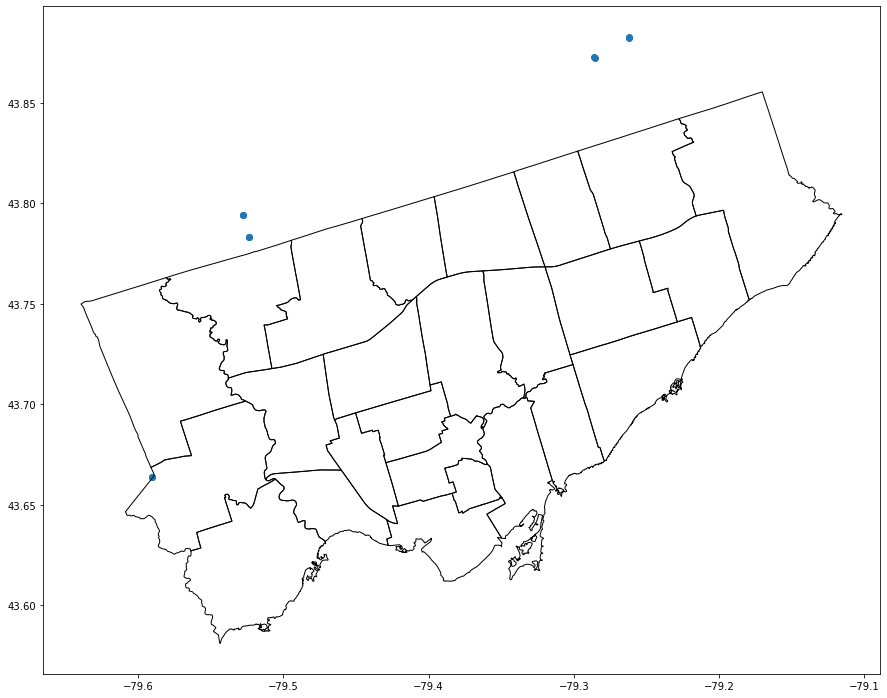

In [204]:
#10 stations are outside wards
nulls=ward_stations.loc[ward_stations['Ward_name'].isnull()==True]
ax = nulls.plot(figsize=(15, 15))
ax = df.plot(facecolor="none", edgecolor="black", ax=ax)

In [205]:
#grouping by ward name and count
station_dict=ward_stations.groupby(["Ward_name"], as_index=False)["stop_name"].count()

In [206]:
#renaming column
station_dict.rename(columns={'stop_name':'n_stations'},inplace=True)

In [207]:
station_dict

,Ward_name,n_stations
0,Beaches-East York,19
1,Davenport,15
2,Don Valley North,27
3,Don Valley West,14
4,Eglinton-Lawrence,34
5,Etobicoke North,4
6,Etobicoke-Lakeshore,28
7,Humber River-Black Creek,11
8,Parkdale-High Park,25
9,Scarborough Centre,30


## 9  Exporting to csv and geojson

In [173]:
#exporting to geojson
stops3.to_file("stops2.geojson", driver='GeoJSON')

In [230]:
stop_ward.to_csv(os.path.join(path, '02 Data','Prepared', 'stop_ward.csv'))
stops_dict.to_csv(os.path.join(path, '02 Data','Prepared', 'stops_dict.csv'))
interest_dict.to_csv(os.path.join(path, '02 Data','Prepared', 'interest_dict.csv'))
school_dict.to_csv(os.path.join(path, '02 Data','Prepared', 'school_dict.csv'))
worship_dict.to_csv(os.path.join(path, '02 Data','Prepared', 'worship_dict.csv'))
stops_stations.to_csv(os.path.join(path, '02 Data','Prepared', 'stops_stations.csv'))
station_dict.to_csv(os.path.join(path, '02 Data','Prepared', 'station_dict.csv'))
